---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [2]:
def answer_one():
        
    # Your Code Here
    G=nx.read_adjlist('Employee_Movie_Choices.txt', nodetype=str, delimiter="\t")
    
    return G# Your Answer Here

answer_one()


### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [3]:
def answer_two():
    
    # Your Code Here
    G=answer_one()
    for node in G.nodes():
        if node in employees:
            G.node[node]['type']='employee'
        else:
            G.node[node]['type']='movie'
    return G# Your Answer Her

answer_two().nodes(data=True)

NodeDataView({'Andy': {'type': 'employee'}, 'Anaconda': {'type': 'movie'}, 'Mean Girls': {'type': 'movie'}, 'The Matrix': {'type': 'movie'}, 'Claude': {'type': 'employee'}, 'Monty Python and the Holy Grail': {'type': 'movie'}, 'Snakes on a Plane': {'type': 'movie'}, 'Frida': {'type': 'employee'}, 'The Shawshank Redemption': {'type': 'movie'}, 'The Social Network': {'type': 'movie'}, 'Georgia': {'type': 'employee'}, 'Joan': {'type': 'employee'}, 'Forrest Gump': {'type': 'movie'}, 'Kung Fu Panda': {'type': 'movie'}, 'Lee': {'type': 'employee'}, 'Pablo': {'type': 'employee'}, 'The Dark Knight': {'type': 'movie'}, 'Vincent': {'type': 'employee'}, 'The Godfather': {'type': 'movie'}})

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

<IPython.core.display.Javascript object>


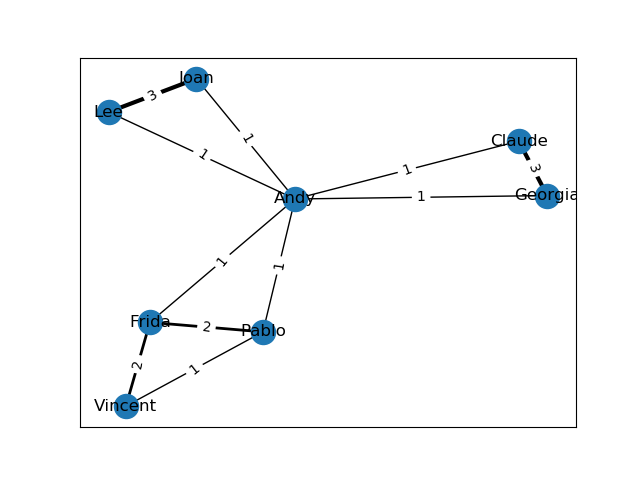

C:\Users\markw\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [4]:
def answer_three():
        
    # Your Code Here
    
    return bipartite.weighted_projected_graph(answer_two(), employees)# Your Answer Here

plot_graph(answer_three(), weight_name='weight')

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [5]:
def answer_four():
        
    # Your Code Here
    
    return # Your Answer Here

answer_three().edges(data=True)
relationship=nx.read_edgelist('Employee_Relationships.txt',data=[('relationship',int)])
common_movies=answer_three()

R_df=pd.DataFrame(relationship.edges(data=True), columns=['From','To','Relationship'])
R_df['Relationship']=R_df['Relationship'].map(lambda x: x['relationship'])

M_df=pd.DataFrame(common_movies.edges(data=True), columns=['From','To','Common_Movies'])
M_df['Common_Movies']=M_df['Common_Movies'].map(lambda x: x['weight'])

# Create copy of M_df so that To and From is the same as From and To
M_df_copy=M_df.copy()
M_df_copy.rename(columns={'To':'From_','From':'To'},inplace=True)
M_df_copy.rename(columns={'From_':'From'},inplace=True)
# Co,bine M_df with M_df_copy
M_df2=pd.concat([M_df,M_df_copy],axis=0)

comb_df=pd.merge(R_df,M_df2, on=['From','To'], how="left")
comb_df.fillna(0,inplace=True)
comb_df['Relationship'].corr(comb_df['Common_Movies'])

C:\Users\markw\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



0.7883962221733475